In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw11.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Homework 11: Regression

## References
* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)
* [Inference for Regression](https://inferentialthinking.com/chapters/16/Inference_for_Regression.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-fa24/resources/quick-reference.html)

---

## Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your Tasks are categorized as auto-graded (📍) and manually graded (📍🔎).
    - For all the auto-graded tasks:
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to run some tests on your code.
        - Keep in mind that for homework and project assignments, sometimes there are hidden tests that you will not be able to see the results of that we use for scoring the correctness of your response. **Passing the auto-grader does not guarantee that your answer is correct.**
    - For all the manually graded tasks:
        - You might need to provide your own response to the provided prompt. Do so by replacing the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or something else using code. Do so by replacing the `...` in the code cell to generate the image, table, etc.
        - In either case, review the rubric on the associated <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page to understand the scoring criteria.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Linear Regression Setup

---

When performing linear regression in this course, you will need to compute several important quantities which will be used throughout our analysis. Unless otherwise specified when asked to make a prediction please assume we are predicting $y$ from $x$ throughout this assignment. To help with our later analysis, we will begin by writing some of these functions and understanding what they can do for us.

---

### Task 01 📍

Define a function `standard_units` that converts a given array to standard units.

**Hint:** You may find the `np.mean` and `np.std` functions helpful.

_Points:_ 2

In [3]:
def standard_units(data):
    return (data - np.mean(data)) / np.std(data)

In [4]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ standard_units works for the test data we provided.
task_01 - 2 message: ✅ The mean of the standardized test data is 0.
task_01 - 3 message: ✅ The standard deviation of the standardized test data is 1.

---

### Task 02 📍

Which of the following are true about standard units? Assume we have converted an array of data into standard units using the function above.

1. The units of the data converted into standard units are the same as the units of the original data.
2. The sum of the data converted into standard units is 0.
3. The standard deviation of the data converted into standard units is 1.
4. Adding 5 to the original data has no impact on the resultant data when converted to standard units.
5. Multiplying the data by 5 has no impact on the resultant data when converted to standard units.

Assign `standard_array` to an array of your selections.

_Points:_ 2

In [5]:
standard_array = make_array(2, 3, 4, 5)

In [6]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ standard_array contains some of the integers 1, 2, 3, 4, or 5.

---

### Task 03 📍

Define a function `correlation` that computes the correlation between 2 arrays of data in original units.

**Hint:** Consider using the `standard_units` function you have defined previously.

_Points:_ 2

In [9]:
def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    
    return np.mean(x_in_standard_units * y_in_standard_units)

In [10]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ correlation shows that linear data has a coefficient of 1.

---

### Task 04 📍

Which of the following statements are true about the correlation coefficient?

1. The correlation coefficient measures the strength of a linear relationship.
2. A correlation coefficient of 1.0 means an increase in one variable always means an increase in the other variable by the same amount.
3. The correlation coefficient is the slope of the regression line in standard units.
4. The correlation coefficient stays the same if we swap our x-axis and y-axis.
5. If we add 5 to our original data, our correlation coefficient will increase by 5.

Assign `r_array` to an array of your selections.

_Points:_ 2

In [11]:
r_array = make_array(1, 3, 4)

In [12]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ r_array contains some of the integers 1, 2, 3, 4, or 5.

---

### Task 05 📍

Define a function `slope` that computes the slope of our line of best fit (to predict y given x), given two arrays of data in original units. Assume we want to create a line of best fit in original units.

**Hint:** Consider using the `correlation` function you have defined previously.

_Points:_ 2

In [15]:
def slope(x, y):
    r = correlation(x, y)
    
    std_x = np.std(x)
    std_y = np.std(y)

    return r * (std_y / std_x)

In [16]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ slope produced the correct result for our test data set.

---

### Task 06 📍

Which of the following are true statements about the slope of our line of best fit? Assume $x$ refers to the value of one variable that we use to predict the value of y.

1. In original units, the slope has the unit: unit of $x$ / unit of $y$.
2. In standard units, the slope is unitless.
3. In original units, the slope is unchanged by swapping $x$ and $y$.
4. In standard units, a slope of 1 means our data is perfectly linearly correlated.
5. In original units and standard units, the slope always has the same positive or negative sign.
 
Assign `slope_array` to an array of your selections.

_Points:_ 2

In [17]:
slope_array = make_array(1, 2, 4, 5)

In [18]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ slope_array contains some of the integers 1, 2, 3, 4, or 5.

---

### Task 07 📍

Define a function `intercept` that computes the intercept of our line of best fit (to predict `y` given `x`), given 2 arrays of data in original units. Assume we want to create a line of best fit in original units.

**Hint:** Consider using slope function you have defined previously.

_Points:_ 2

In [19]:
def intercept(x, y):

    m = slope(x, y)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    return mean_y - m * mean_x

In [20]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ intercept produced the correct result for our test data set.

---

### Task 08 📍

Which of the following are true about the intercept of our line of best fit? Assume $x$ refers to the value of one variable that we use to predict the value of $y$.

1. In original units, the intercept has the same unit as the $y$ values.
2. In original units, the intercept has the same unit as the $x$ values.
3. In original units, the slope and intercept have the same unit.
4. In standard units, the intercept for the regression line is 0.
5. In both original and standard units, the intercept does not necessarily have the same numerical value.

Assign `intercept_array` to an array of your selections.

_Points:_ 2

In [21]:
intercept_array = make_array(1, 4, 5)

In [22]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ intercept_array contains some of the integers 1, 2, 3, 4, or 5.

---

### Task 09 📍

Define a function `predict` that takes in a table and 2 column names, and returns an array of predictions. Keep the following in mind when you make this function:
* The predictions should be created using a fitted regression line.
* We are predicting `y_col` from `x_col`, both in original units.

**Hint 1:** Consider using the `slope` and `intercept` functions you have defined previously.

**Hint 2:** Re-reading [Section 15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html) might be helpful here.

**Note:** The public tests are quite comprehensive for this question, so passing them means that your function most likely works correctly.

_Points:_ 3

In [23]:
def predict(tbl, x_col, y_col):
    x = tbl.column(x_col)
    y = tbl.column(y_col)

    m = slope(x, y)
    b = intercept(x, y)
    
    predictions = m * x + b
    
    return predictions

In [24]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ predict returns an array.
task_09 - 2 message: ✅ predict seems to work correctly on the test data we used.
task_09 - 3 message: ✅ predict seems to work correctly on the test data we used.
task_09 - 4 message: ✅ predict seems to work correctly on the test data we used.

---

## FIFA Predictions

---

The following data was [scraped](https://en.wikipedia.org/wiki/Data_scraping) from [sofifa.com](https://sofifa.com/), a website dedicated to collecting information from FIFA video games. The dataset consists of all players in [FIFA 22](https://en.wikipedia.org/wiki/FIFA_22) and their corresponding attributes. We have truncated the dataset to a limited number of rows (100) to ease with our visualizations and analysis. 

**Since we're learning about linear regression, we will look specifically for a linear association between various player attributes. To help with understanding where the line of best fit generated in linear regression comes from please do not use the `.fit_line` argument in `.scatter` at any point on question 2 unless the code was provided for you.**

Run the following cell to load the data and reduce the original data to a more manageable amount of information. (There are 110 columns in the original dataset!) 

In [25]:
fifa = Table.read_table('fifa22.csv')
fifa = fifa.select("short_name", "overall", "value_eur", 
                   "wage_eur", "age", "pace", "shooting", 
                   "passing", "attacking_finishing")
fifa.show(5)

short_name,overall,value_eur,wage_eur,age,pace,shooting,passing,attacking_finishing
L. Messi,93,78000000,320000,34,85,92,91,95
R. Lewandowski,92,119500000,270000,32,78,92,79,95
Cristiano Ronaldo,91,45000000,270000,36,87,94,80,95
Neymar Jr,91,129000000,270000,29,91,83,86,83
K. De Bruyne,91,125500000,350000,30,76,86,93,82


---

### Task 10 📍🔎

<!-- BEGIN QUESTION -->

Before jumping into any statistical techniques, it's important to see what the data looks like, because data visualizations allow us to uncover patterns in our data that would have otherwise been much more difficult to see.

Create a scatter plot with age on the x-axis (`"age"`), and the player's value in Euros (`"value_eur"`) on the y-axis.

_Points:_ 2

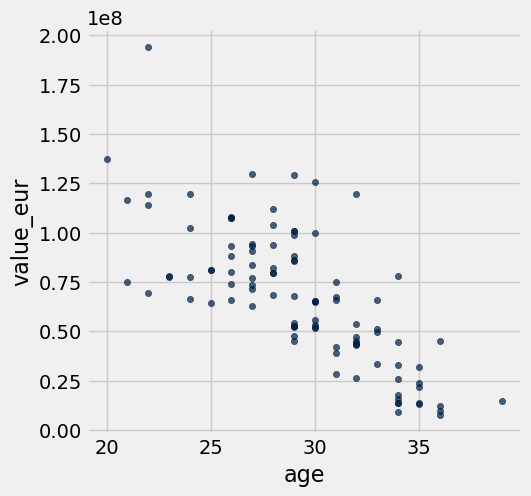

In [26]:
fifa.scatter("age", "value_eur")

<!-- END QUESTION -->

---

### Task 11 📍🔎

<!-- BEGIN QUESTION -->

Create a scatter plot with player age (`"age"`) along the x-axis and both real player value (`"value_eur"`) and predicted player value along the y-axis. 

* The predictions should be created using a fitted regression line.
* The color of the dots for the real player values should be different from the color for the predicted player values.

**Hint 1:** Consider using the `predict` function you have defined previously.

**Hint 2:** [Section 15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html) and [Section 7.3](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html) have examples of creating such scatter plots.

_Points:_ 2

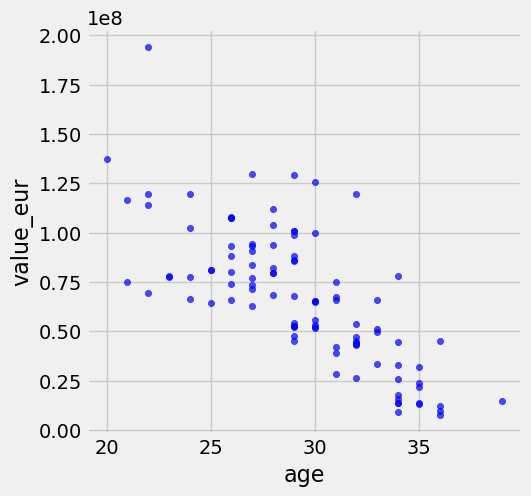

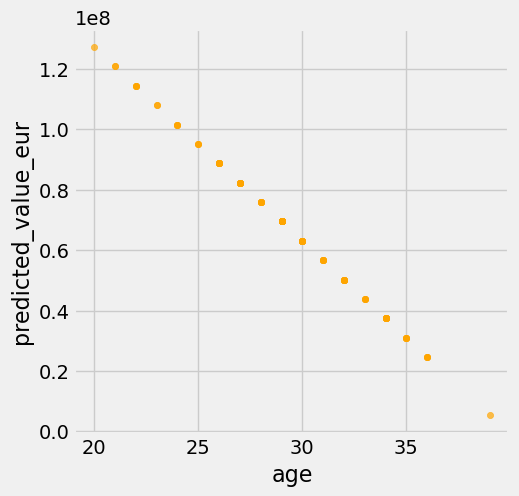

In [27]:
predictions = predict(fifa, "age", "value_eur")

fifa_with_predictions = fifa.with_column("predicted_value_eur", predictions)

fifa_with_predictions.scatter("age", "value_eur", color="blue", label="Real Values")
fifa_with_predictions.scatter("age", "predicted_value_eur", color="orange", label="Predicted Values")


<!-- END QUESTION -->

---

### Task 12 📍🔎

<!-- BEGIN QUESTION -->

Looking at the scatter plot you produced above, is linear regression a good model to use? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?

_Points:_ 2

Linear regression adequately shows the general trend of decreasing player value with age, but it doesn't capture the variability among players of the same age. Younger players with high values suggest potential non-linearities that this model overlooks. Incorporating additional features would improve accuracy.

<!-- END QUESTION -->

---

### Task 13 📍

Define a function `rmse` that takes in two arguments: a slope and an intercept for a potential regression line. The function should return the root mean squared error between the values predicted by a regression line with the given slope and intercept and the actual outcomes.

**Note:** Assume we are still predicting `"value_eur"` from `"age"` in original units from the `fifa` table.

_Points:_ 2

In [28]:
def rmse(slope, intercept):

    ages = fifa.column("age")
    actual_values = fifa.column("value_eur")

    predictions = slope * ages + intercept
    errors = actual_values - predictions
    
    return (np.mean(errors ** 2)) ** 0.5

In [29]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ rmse returns a float.
task_13 - 2 message: ✅ rmse seems to work on our test data.

---

### Task 14 📍🔎

<!-- BEGIN QUESTION -->

1. Use the `rmse` function you defined along with `minimize` to find the least-squares regression parameters predicting player value from player age. Review the [example of using the `minimize` function from the textbook](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).
2. Then set `lsq_slope` and `lsq_intercept` to be the least-squares regression line slope and intercept, respectively.
3. Finally, create a scatter plot like you did in Task 11 with player age (`"age"`) along the x-axis and both real player value (`"value_eur"`) and predicted player value along the y-axis. Be sure to use your least-squares regression line to compute the predicted values. The color of the dots for the real player values should be different from the color for the predicted player values.

**Note:** Your solution should **not** make any calls to the slope or intercept functions defined earlier. You are demonstrating a different method for creating the line in this task.

**Hint:** Your call to `minimize` will return an array of argument values that minimize the return value of the function passed to minimize.

_Points:_ 2

Slope: 2.14583e+06 | Intercept: 85833.2


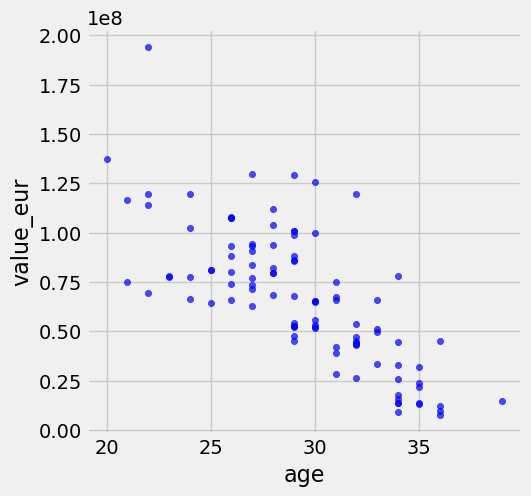

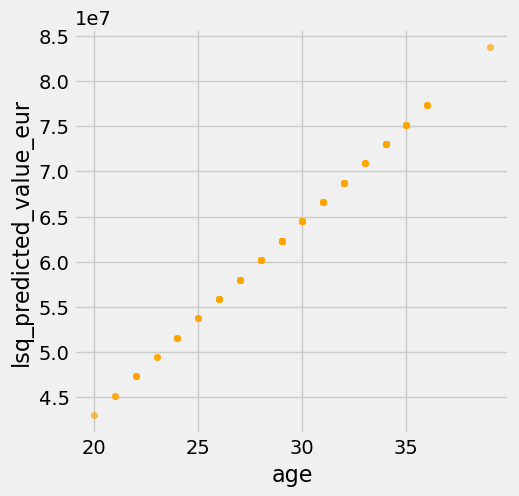

In [46]:
minimized_parameters = minimize(rmse_for_minimize, [0, 0])  

lsq_slope, lsq_intercept = minimized_parameters.x  

# Print the slope and intercept
print("Slope: {:g} | Intercept: {:g}".format(lsq_slope, lsq_intercept))

lsq_predictions = lsq_slope * fifa.column("age") + lsq_intercept

fifa_with_lsq_predictions = fifa.with_column("lsq_predicted_value_eur", lsq_predictions)

fifa_with_lsq_predictions.scatter("age", "value_eur", color="blue", label="Real Player Values")
fifa_with_lsq_predictions.scatter("age", "lsq_predicted_value_eur", color="orange", label="Predicted Player Values")


<!-- END QUESTION -->

---

### Task 15 📍🔎

<!-- BEGIN QUESTION -->

What do you notice about the visuals produced in Task 11 and Task 14, and what can you conclude about the two different methods you used to create those two lines of gold dots, the predicted values? In your response, make sure to reference [Section 15.3](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html) of the textbook to justify what you write.

_Points:_ 2

The predict function in Task 11 appears to model non-linear data more effectively than Task 14’s least squares regression, which assumes a linear relationship and produces a straight line. Section 15.3 explains that least squares is effective for linear patterns but less suitable for non-linear data, making Task 11’s method better for such scenarios.

<!-- END QUESTION -->

---

## Regression Inference

---

Previously, you've used confidence intervals to quantify uncertainty about estimates. You can also run hypothesis tests using a confidence interval under the following procedure:

1. Define a null and alternative hypothesis (they must be of the form "The parameter is X" and "The parameter is not X").
2. Choose a p-value cutoff, and call it $q$.
3. Construct a $(100-q)\%$ interval using bootstrap sampling (for example, if your p-value cutoff is 0.01, or 1%, then construct a 99% confidence interval).
4. Using the confidence interval, determine if your data are more consistent with your null or alternative hypothesis:
   * If the null hypothesis parameter X is in your confidence interval, the data are more consistent with the null hypothesis.
   * If the null hypothesis parameter X is *not* in your confidence interval, the data are more consistent with the alternative hypothesis.

More recently, we've discussed the use of linear regression to make predictions based on correlated variables. For example, we can predict the height of children based on the heights of their parents.

We can combine these two topics to make powerful statements about our population by using the following techniques:

- Bootstrapped interval for the true slope
- Bootstrapped prediction interval for y (given a particular value of x)

This part of the homework explores constructing an interval for the true slope.

---

### The Data

The [Snowy Plover](https://www.audubon.org/field-guide/bird/snowy-plover) is a tiny bird that lives on the coast in parts of California and elsewhere. It is so small that it is vulnerable to many predators, including people and dogs that don't look where they are stepping when they go to the beach. It is considered endangered in many parts of the U.S.

The data are about the eggs and newly-hatched chicks of the Snowy Plover. Here's a picture of [a parent bird incubating its eggs](http://cescos.fau.edu/jay/eps/articles/snowyplover.html).

<img src="plover_and_eggs.jpeg" alt="Plover and Eggs">

The data were collected at the Point Reyes National Seashore by a former [student at Berkeley](https://openlibrary.org/books/OL2038693M/BLSS_the_Berkeley_interactive_statistical_system). The goal was to see how the size of an egg could be used to predict the weight of the resulting chick. The bigger the newly-hatched chick, the more likely it is to survive.

<img src="plover_and_chick.jpeg" alt="Plover and Chick">

Each row of the table below corresponds to one Snowy Plover egg and the resulting chick. Note how tiny the bird is:

- `Egg Length` and `Egg Breadth` (widest diameter) are measured in millimeters
- `Egg Weight` and `Bird Weight` are measured in grams; for comparison, a standard paper clip weighs about one gram

In [47]:
birds = Table.read_table('snowy_plover.csv')
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight
28.8,21.84,7.4,5.2
29.04,22.45,7.7,5.4
29.36,22.48,7.9,5.6
30.1,21.71,7.5,5.3
30.17,22.75,8.3,5.9
30.34,22.84,8.5,5.8
30.36,22.5,8.2,5.8
30.46,22.72,8.3,6
30.54,23.31,9,6.1
30.62,22.94,8.5,6.2


In this investigation, we will be using the egg weight to predict bird weight. Run the cell below to create a scatter plot of the egg weights and bird weights, along with their line of best fit.

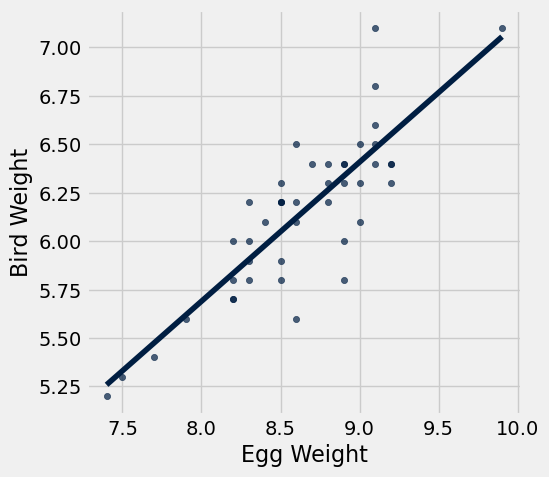

In [48]:
# Just run this cell and examine the scatter plot.
birds.scatter('Egg Weight', "Bird Weight", fit_line=True)

---

### Residual Plot

It seems like a linear model might be appropriate to apply to this situation, but you should check the residual plot before moving forward. You'll likely find the `standard_units` and `correlation` functions from above useful.

---

#### Task 16 📍

Create a function called `fit_line`.  It should take a table (e.g. `birds`) and the column names associated with *x* and *y* as its arguments and return an *array* containing the slope and intercept of the regression line (in that order) that predicts the *y* column in the table using the *x* column.

_Points:_ 3

In [49]:
def fit_line(tbl, x_col, y_col):
    x_vals = tbl.column(x_col)
    y_vals = tbl.column(y_col)
    r = np.mean(standard_units(x_vals) * standard_units(y_vals))
    slope = r * (np.std(y_vals) / np.std(x_vals))
    intercept = np.mean(y_vals) - slope * np.mean(x_vals)
    return make_array(slope, intercept)

fit_line(birds, "Egg Weight", "Bird Weight")

array([ 0.71851534, -0.05827226])

In [50]:
grader.check("task_16")

task_16 results: All test cases passed!
task_16 - 1 message: ✅ Your fit_line function produces an array.
task_16 - 2 message: ✅ The array from your fit_line function contains 2 items.
task_16 - 3 message: ✅ Your fit_line function produced the correct two values for our test data.

---

Now, run the following cell to plot the line produced by calling `fit_line` on the `birds` table.

**Note:** You are not responsible for the code in the cell below, but make sure that your `fit_line` function generates a reasonable line for the data. Compare the line with the line produced in the scatter plot above with the `fit_line=True` parameter.

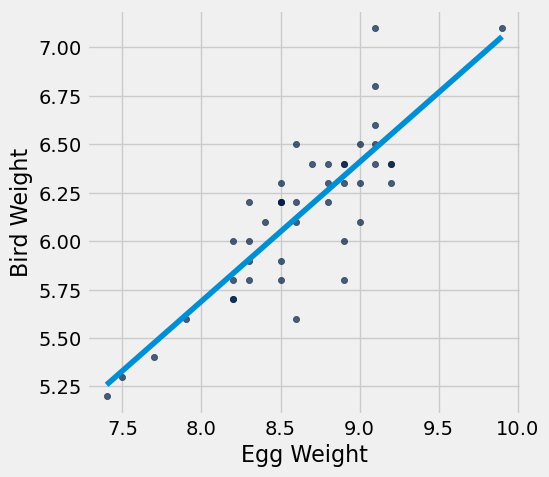

In [51]:
# Just run this cell
snowy_slope, snowy_intercept = fit_line(birds, "Egg Weight", "Bird Weight")
birds.scatter("Egg Weight", "Bird Weight")
plt.plot([min(birds.column("Egg Weight")), 
          max(birds.column("Egg Weight"))], 
         [snowy_slope*min(birds.column("Egg Weight"))+snowy_intercept, 
          snowy_slope*max(birds.column("Egg Weight"))+snowy_intercept])
plt.show()

---

#### Task 17 📍

With a linear regression model, update the `birds` table with a column of predicted birth weights using the regression line and the associated residuals.

1. Create an array called `predicted_bird_weights` that contains the predicted bird weights from the regression line.
2. Create an array called `residuals` that contains the residuals associated with those predictions.
3. Update the `birds` table to include columns `'Predicted Bird Weight'` and `'Residual'` with their respective data.

**Hint:** Consider using the variables `snowy_slope`, `snowy_intercept` we defined above.

_Points:_ 3

In [52]:
predicted_bird_weights = snowy_slope * birds.column("Egg Weight") + snowy_intercept
residuals = birds.column("Bird Weight") - predicted_bird_weights
birds = birds.with_columns(
    'Predicted Bird Weight', predicted_bird_weights,
    'Residual', residuals)

In [53]:
grader.check("task_17")

task_17 results: All test cases passed!
task_17 - 1 message: ✅ The birds table has the correct labels.
task_17 - 2 message: ✅ The sum of your predicted bird weights seems correct.
task_17 - 3 message: ✅ The average residual calculated from your array residuals is (approximately) 0.
task_17 - 4 message: ✅ The correlation between the egg weights and residuals calculated from your birds table is (approximately) 0.

---

#### Task 18 📍🔎

<!-- BEGIN QUESTION -->

Now that you have the residuals for these predictions:
1. Create a residual plot showing egg weights on the horizontal axis and the residuals on the vertical axis.
2. In the space provided, provide a short justification as to why it is reasonable to predict bird weight from egg weight using the linear model. Make sure to point out features from the residual plot relevant to [Section 15.5](https://inferentialthinking.com/chapters/15/5/Visual_Diagnostics.html#regression-diagnostics) that back up your justification. Additionally, it is reasonable to express concerns about applying a model to a given situation, so you are welcome to point out any concerns in relation to the content from Section 15.5.

_Points:_ 2

The residual plot confirms that the linear model is reasonable, with residuals randomly scattered around zero. The consistent spread and small size of residuals suggest the model meets key assumptions and makes accurate predictions. Patterns or outliers could highlight areas for further investigation. Section 15.5 states that the absence of trends in residuals supports the model's validity.

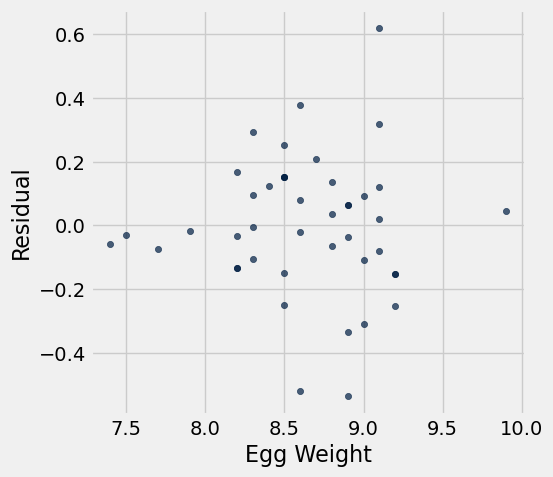

In [54]:
# Generate the residual plot here
birds.scatter('Egg Weight', 'Residual')

<!-- END QUESTION -->

---

### Finding the Bootstrap Confidence Interval for the True Slope

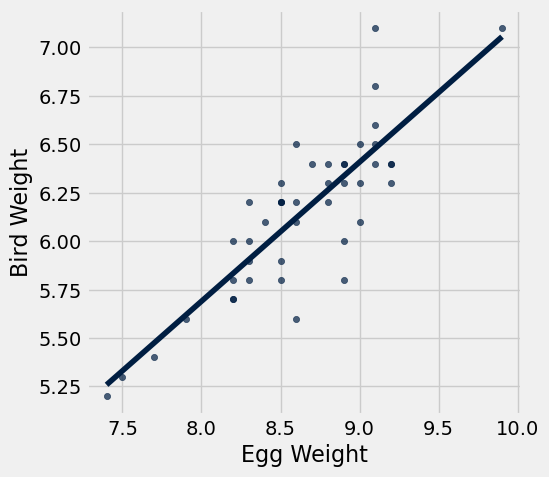

In [55]:
# Just run this cell
birds.scatter('Egg Weight', "Bird Weight", fit_line=True)

Looking at the scatter plot of our sample, we observe a linear relationship between egg weight and bird weight. However, relationships that appear in a sample might not exist in the population from which the sample was taken.

We want to know if there truly exists a linear relationship between egg weight and bird weight for Snowy Plovers. If there is no linear relationship between the two variables, then we'd expect a correlation of 0. Consequently, the slope of the regression line would also be 0. 

We highly recommend reviewing section [16.2](https://inferentialthinking.com/chapters/16/2/Inference_for_the_True_Slope.html) before attempting this part of the homework

---

#### Task 19 📍

Let's run a hypothesis test using confidence intervals to see if there is a linear relationship between egg weight and bird weight. Define the null and alternative hypotheses that will allow you to conduct this test.

- **Null Hypothesis: The true slope of the regression line relating egg weight and bird weight for Snowy Plovers is ____.**
- **Alternative Hypothesis: The true slope of the regression line relating egg weight and bird weight for Snowy Plovers is not ____.**

Assign `snowy_slope_null_value` to the numerical value that completes both of the above statements to form an appropriate pair of hypotheses for this test.

_Points:_ 2

In [56]:
snowy_slope_null_value = 0

In [57]:
grader.check("task_19")

task_19 results: All test cases passed!
task_19 - 1 message: ✅ snowy_slope_null_value is assigned to a number.

---

Next, you will create a confidence interval that quantifies our uncertainty about the true relationship between egg weight and bird weight.

---

#### Task 20 📍

Create an array called `resampled_slopes` that contains the slope of the best fit line for 1,000 bootstrap resamples of `birds`. Plot the distribution of these slopes.

_Points:_ 2

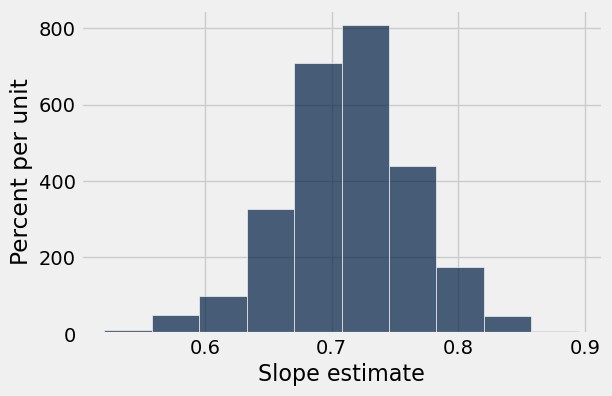

In [60]:
resampled_slopes = make_array()

for i in np.arange(1_000): 
    birds_bootstrap = birds.sample(with_replacement=True)
    bootstrap_line = fit_line(birds_bootstrap, "Egg Weight", "Bird Weight")
    bootstrap_slope = bootstrap_line.item(0)
    resampled_slopes = np.append(resampled_slopes, bootstrap_slope)
    
# DO NOT CHANGE THIS LINE
Table().with_column("Slope estimate", resampled_slopes).hist()

In [61]:
grader.check("task_20")

task_20 results: All test cases passed!
task_20 - 1 message: ✅ resampled_slopes is an array.
task_20 - 2 message: ✅ resampled_slopes contains 1,000 numerical values.

---

#### Task 21 📍

Use your resampled slopes to construct an 95% confidence interval for the true value of the slope.

_Points:_ 3

In [62]:
lower_end = np.percentile(resampled_slopes, 2.5)
upper_end = np.percentile(resampled_slopes, 97.5)
print("95% confidence interval for slope: [{:g}, {:g}]".format(lower_end, upper_end))

95% confidence interval for slope: [0.599547, 0.815327]


In [63]:
grader.check("task_21")

task_21 results: All test cases passed!
task_21 - 1 message: ✅ The lower_end value is greater than 0.
task_21 - 2 message: ✅ The upper_end value is less than 4.

---

#### Task 22 📍🔎

<!-- BEGIN QUESTION -->

In your response, make to address the following:
1. Based on your confidence interval, would you **reject** or **fail to reject** the null hypothesis that the true slope is 0? 
2. Provide an explanation Why?  
3. What p-value cutoff are you using?

**Hint:** Re-read the [Regression Inference section](#Regression-Inference) of this homework.

_Points:_ 2

If the 95% confidence interval does not contain 0, we reject the null hypothesis that the slope is 0, supporting a linear relationship between egg weight and bird weight. The p-value cutoff is set at 
α=0.05, ensuring 95% confidence. Including 0 in the interval would result in failing to reject the null hypothesis, implying no significant relationship.

<!-- END QUESTION -->

---

## Submit Your Assignment to Canvas

Follow these steps to submit your homework assignment:

1. **Review the Rubric:** View the rubric on the associated Canvas Assignment page to understand the scoring criteria.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download IPYNB` to download the notebook (`.ipynb`) file.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.ipynb` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [64]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ standard_units works for the test data we provided.
task_01 - 2 message: ✅ The mean of the standardized test data is 0.
task_01 - 3 message: ✅ The standard deviation of the standardized test data is 1.

task_02 results: All test cases passed!
task_02 - 1 message: ✅ standard_array contains some of the integers 1, 2, 3, 4, or 5.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ correlation shows that linear data has a coefficient of 1.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ r_array contains some of the integers 1, 2, 3, 4, or 5.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ slope produced the correct result for our test data set.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ slope_array contains some of the integers 1, 2, 3, 4, or 5.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ intercept produced the correct result for our test data 